In [2]:
d_model = 512
max_len = 100

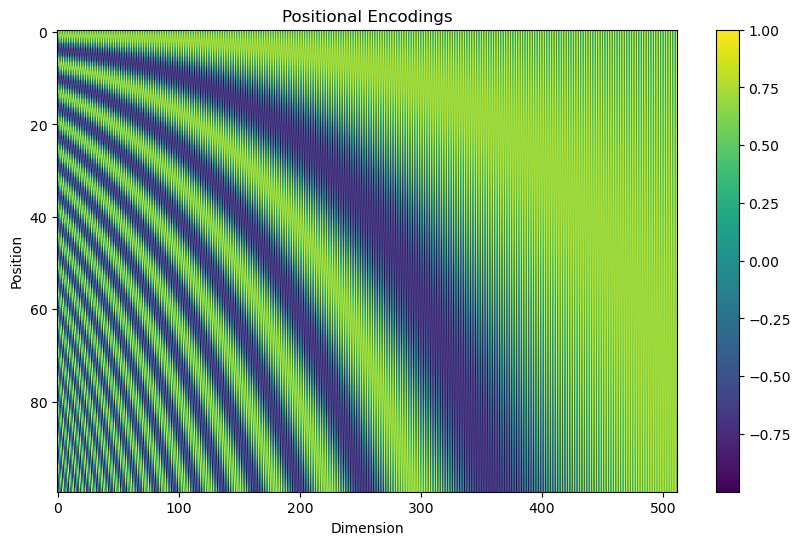

In [3]:
import numpy as np

import matplotlib.pyplot as plt

positions = np.arange(max_len)[:, np.newaxis]
angles = np.exp(-np.log(10000.0) * np.arange(d_model // 2) / d_model)
encodings = np.zeros((max_len, d_model))

encodings[:, 0::2] = np.sin(positions * angles)
encodings[:, 1::2] = np.cos(positions * angles)

plt.figure(figsize=(10, 6))
plt.imshow(encodings, cmap='viridis', aspect='auto')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.colorbar()
plt.title('Positional Encodings')
plt.show()

In [1]:
import torch
import torch.nn as nn
import networkx as nx

class RelPositionalEncoder(nn.Module):
    def __init__(self, d_model, max_relative_positions=10):
        super(RelPositionalEncoder, self).__init__()
        self.d_model = d_model
        self.max_relative_positions = max_relative_positions
        self.relative_position_embeddings = nn.Embedding(2 * max_relative_positions + 1, d_model)

    def forward(self, graph: nx.DiGraph):
        # Get adjacency matrix of the graph
        adj_matrix = nx.adjacency_matrix(graph).todense()
        num_nodes = adj_matrix.shape[0]

        # Initialize relative position matrix
        rel_pos_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.long)

        # Compute relative positions
        for i in range(num_nodes):
            for j in range(num_nodes):
                rel_pos = j - i
                if rel_pos < -self.max_relative_positions:
                    rel_pos = -self.max_relative_positions
                elif rel_pos > self.max_relative_positions:
                    rel_pos = self.max_relative_positions
                rel_pos_matrix[i, j] = rel_pos + self.max_relative_positions

        # Get the relative position encodings
        rel_pos_encodings = self.relative_position_embeddings(rel_pos_matrix)

        return rel_pos_encodings

In [3]:
# Example usage

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4)])

# Initialize the encoder
d_model = 64
encoder = RelPositionalEncoder(d_model)

# Forward pass
rel_pos_encodings = encoder(G)
print(rel_pos_encodings.shape)  # Should print (num_nodes, num_nodes, d_model)
print(rel_pos_encodings)

torch.Size([5, 5, 64])
tensor([[[-0.6826, -0.1487,  1.6233,  ...,  0.8199,  0.5654, -0.0750],
         [ 0.7684, -0.2374, -0.2144,  ...,  2.0673, -0.2275, -0.8888],
         [ 0.2880,  0.0990, -1.9830,  ...,  0.6190,  0.1516, -0.3485],
         [ 0.0898, -1.0165, -0.2147,  ..., -0.7486,  0.2269, -0.3555],
         [-0.5445, -0.0458,  0.5148,  ...,  0.6152,  0.6804,  0.9358]],

        [[-0.5513,  2.1337, -0.9672,  ...,  0.0736, -0.5731, -0.9270],
         [-0.6826, -0.1487,  1.6233,  ...,  0.8199,  0.5654, -0.0750],
         [ 0.7684, -0.2374, -0.2144,  ...,  2.0673, -0.2275, -0.8888],
         [ 0.2880,  0.0990, -1.9830,  ...,  0.6190,  0.1516, -0.3485],
         [ 0.0898, -1.0165, -0.2147,  ..., -0.7486,  0.2269, -0.3555]],

        [[ 0.5550, -0.5915,  0.1554,  ...,  0.4845, -2.1223, -0.8874],
         [-0.5513,  2.1337, -0.9672,  ...,  0.0736, -0.5731, -0.9270],
         [-0.6826, -0.1487,  1.6233,  ...,  0.8199,  0.5654, -0.0750],
         [ 0.7684, -0.2374, -0.2144,  ...,  2.0673